ASYMINTERVALS

Biblioteka asymintervals pozwala zastosować asymetryczne przedziały liczbowe. Pomaga to modelowaniu niepewności, poprzez zastosowanie przedziałów, gdzie wykorzystywane są: dolna i górna granica przedziału oraz wartość oczekiwana.

W  połączeniu z biblioteką pymcdm pozwala to na dokładniejsze tworzenie predykcji w sytuacji niepewności.

W teście zostały wykorzystane 3 przykładowe przedziały zawierające ceny mieszkań (min,max,expected) oraz na sztywno przypisane wartości czynszów. Następnie zostało przeprowadzone badanie, mające ustalić które mieszkanie na 100 losowań będzie najczęściej wybrane.

[ 6 55 39]


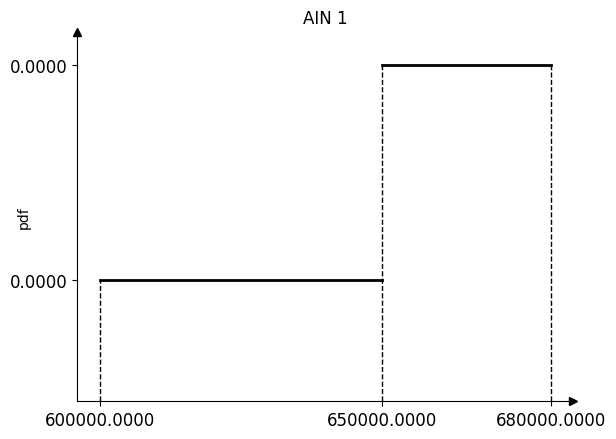

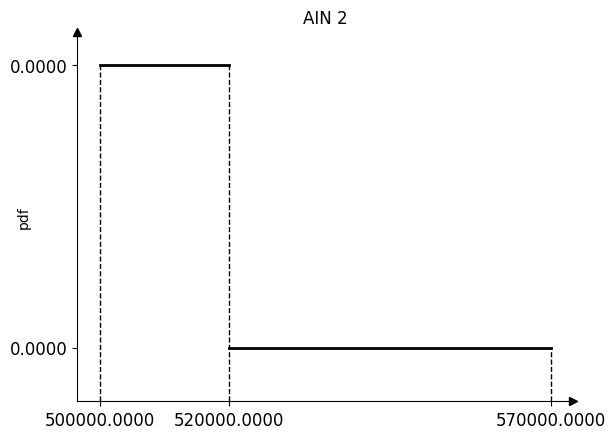

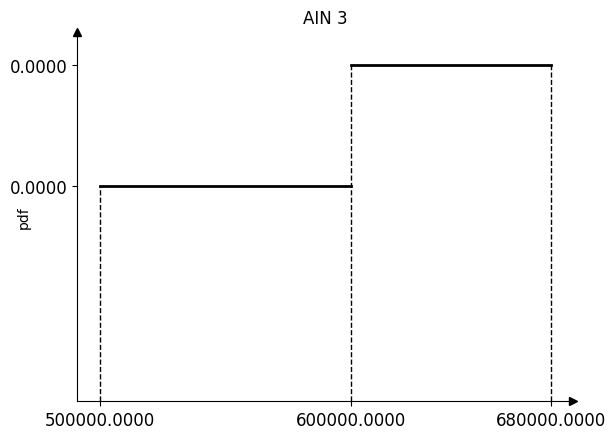

In [3]:
from asymintervals import AIN 
import numpy as np
from pymcdm.methods import SPOTIS
from pymcdm.helpers import rankdata
import matplotlib.pyplot as plt

# ceny w postaci asymetrycznych liczb przedziałowych
price_ain = [
    AIN(600_000, 680_000, 650_000),
    AIN(500_000, 570_000, 520_000),
    AIN(500_000, 680_000, 600_000)
]

# wartości drugiego kryterium
rents = np.array([300,700,500])
weights = np.array([0.6, 0.4])      # wagi kryteriów
types = np.array([-1,-1])           # typy kryteriów (kosztowe)

rnd = np.random.default_rng(0)       # generator liczb losowych
rankings = []                        # lista rankingów

for _ in range(100):                 # symulacja Monte Carlo
    prices = np.array([
        rnd.uniform(x.lower, x.upper) for x in price_ain
    ])                               # losowanie cen z przedziałów

    matrix = np.array([              # macierz decyzyjna
        [prices[0], rents[0]],
        [prices[1], rents[1]],
        [prices[2], rents[2]]
    ])
    bounds = np.array([              # granice kryteriów
        [np.min(prices), np.max(prices)],
        [np.min(rents), np.max(rents)]
    ])

    body_spotis = SPOTIS(bounds)     # inicjacja metody SPOTIS
    pref_spotis = body_spotis(matrix,weights, types)  # obliczenie preferencji
    ranking = rankdata(pref_spotis) # wyznaczenie rankingu
    rankings.append(ranking)         # zapis rankingu

rankings = np.array(rankings)

best_counter = [0,0,0]               # licznik pierwszych miejsc

for ranking in rankings:
    for i, position in enumerate(ranking):
        if position == 1:
            best_counter[i] += 1

print(np.sum(rankings == 1, axis = 0))  # liczba zwycięstw alternatyw

for i, ain in enumerate(price_ain):
    plt.figure()
    ain.plot()                         # wykres AIN
    plt.title(f"AIN {i+1}")
    plt.show()
